In [26]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout

# 1. Data Preprocessing


In [27]:
df = pd.read_csv('english_spam.csv')

In [28]:
df.sample(10)

,labels,text
4245,ham,"Night has ended for another day, morning has c..."
758,ham,"We are at grandmas. Oh dear, u still ill? I fe..."
141,ham,"Sir, Waiting for your mail."
3553,ham,"Probably not, still going over some stuff here"
5019,ham,NaN
3561,ham,I will reach ur home in <#> minutes
3626,ham,Nothing spl..wat abt u and whr ru?
3798,ham,"Right on brah, see you later"
2054,ham,In xam hall boy asked girl Tell me the startin...
1926,ham,HI DARLIN IVE JUST GOT BACK AND I HAD A REALLY...


In [29]:
df.shape

(5407, 2)

In [30]:
df.info

<bound method DataFrame.info of      labels                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5402   spam                                                NaN
5403    ham                                                NaN
5404    ham  Pity, * was in mood for that. So...any other s...
5405    ham  The guy did some bitching but I acted like i'd...
5406    ham                         Rofl. Its true to its name

[5407 rows x 2 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

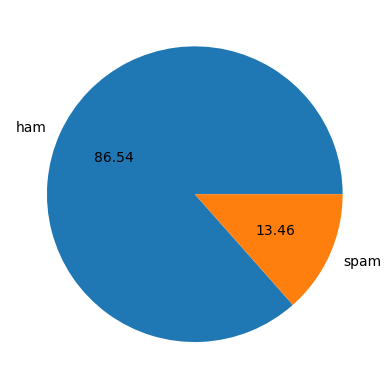

In [31]:
#plotting
plt.pie(df['labels'].value_counts(), labels = ['ham', 'spam'], autopct="%0.2f")
plt.show

In [32]:
# Split the dataset into input (SMS messages) and target (spam or not)

texts = df['text'].astype(str).values
labels = df['labels'].map({'ham': 0, 'spam': 1}).values
print('Texts:',texts)
print('Labels:',labels)

Texts: ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']
Labels: [0 0 1 ... 0 0 0]


In [33]:
#Tokenization and Padding
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, padding='post')



In [35]:
with open('tokenizer2.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
max_length = padded_sequences.shape[1]
with open('max_length2.pkl', 'wb') as f:
    pickle.dump(max_length, f)

# 2. Model 


In [9]:
model = Sequential()
model.add(Embedding(max_words, 32, input_length = padded_sequences.shape[1]))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation ='sigmoid'))

In [10]:
#model compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
#Train_test_split
train_size = int(0.8 * len(padded_sequences))
train_texts = padded_sequences[:train_size]
train_labels = labels[:train_size]
test_texts = padded_sequences[train_size:]
test_labels = labels[train_size:]

In [12]:
#Training the model
epochs = 10 
batch_size = 32
history = model.fit(train_texts, train_labels, epochs=epochs, batch_size=batch_size, validation_data=(test_texts, test_labels))

Epoch 1/10


2023-07-05 13:54:20.842425: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


136/136 [==============================] - 9s 59ms/step - loss: 0.3187 - accuracy: 0.8849 - val_loss: 0.1264 - val_accuracy: 0.9390
Epoch 2/10
136/136 [==============================] - 8s 58ms/step - loss: 0.1184 - accuracy: 0.9431 - val_loss: 0.1124 - val_accuracy: 0.9418
Epoch 3/10
136/136 [==============================] - 8s 58ms/step - loss: 0.0985 - accuracy: 0.9473 - val_loss: 0.1102 - val_accuracy: 0.9464
Epoch 4/10
136/136 [==============================] - 8s 59ms/step - loss: 0.0891 - accuracy: 0.9468 - val_loss: 0.1247 - val_accuracy: 0.9399
Epoch 5/10
136/136 [==============================] - 8s 58ms/step - loss: 0.0823 - accuracy: 0.9461 - val_loss: 0.1196 - val_accuracy: 0.9445
Epoch 6/10
136/136 [==============================] - 8s 56ms/step - loss: 0.0740 - accuracy: 0.9535 - val_loss: 0.1172 - val_accuracy: 0.9464
Epoch 7/10
136/136 [==============================] - 8s 57ms/step - loss: 0.0685 - accuracy: 0.9565 - val_loss: 0.1583 - val_accuracy: 0.9427
Epoch 8/10

In [13]:
filename = "model2.h5"
model.save(filename)

# 3. Evaluating the Model

In [14]:
loss, accuracy = model.evaluate(test_texts, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

34/34 [==============================] - 0s 14ms/step - loss: 0.1301 - accuracy: 0.9473
Test Loss: 0.13014721870422363
Test Accuracy: 0.9473198056221008


In [15]:
tf.keras.models.save_model(model, 'english_model.h5')

In [16]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

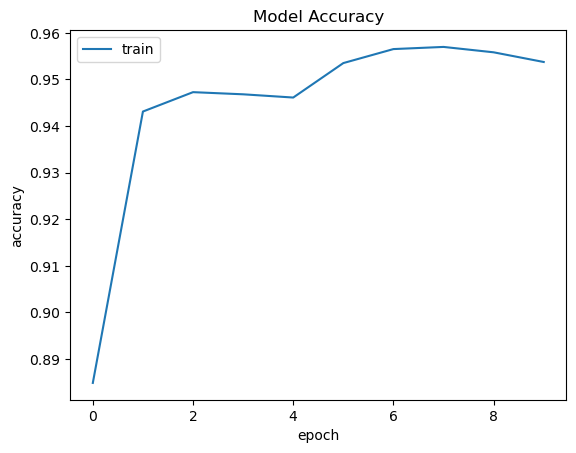

In [17]:
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

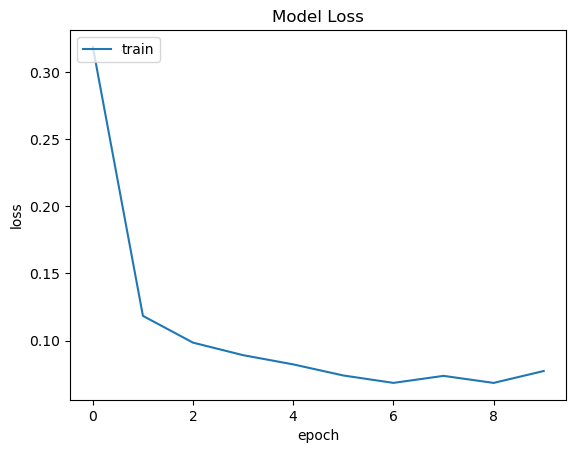

In [18]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

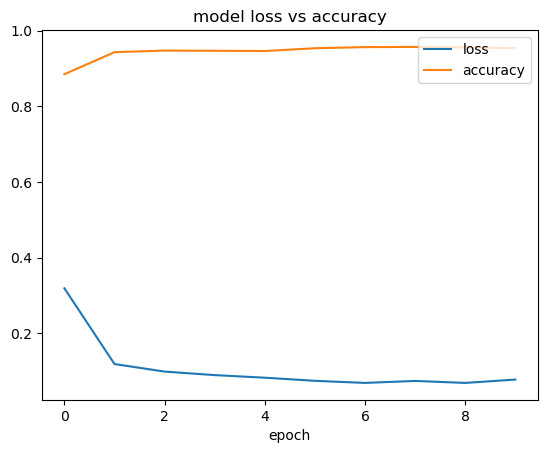

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss vs accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.show() 

In [25]:

# Take user input
user_input = input("Enter a message: ")

# Preprocess the user input
user_sequence = tokenizer.texts_to_sequences([user_input])
user_padded_sequence = pad_sequences(user_sequence, padding='post', maxlen=padded_sequences.shape[1])

# Make prediction on user input
prediction = model.predict(user_padded_sequence)

# Interpret the prediction
if prediction >= 0.5:
    print("The message is predicted as spam.")
else:
    print("The message is predicted as not spam.")


Enter a message: Dear Customer, your UPI registration for WhatsApp has started. Do not share your Debit card details/One time password or OTP/Expiry date number to avoid any financial loss. If it is not initiated by you, please report to your bank immediately.
1/1 [==============================] - 0s 25ms/step
The message is predicted as not spam.


In [21]:


# # Load and preprocess the real-world data
# real_data = pd.read_csv('realdata.csv')
# real_texts = real_data['text'].astype(str).values
# real_sequences = tokenizer.texts_to_sequences(real_texts)
# real_padded_sequences = pad_sequences(real_sequences, padding='post')

# # Make predictions on the real-world data
# predictions = model.predict(real_padded_sequences)

# # Interpret the predictions
# for i, prediction in enumerate(predictions):
#     if prediction >= 0.5:
#         print(f"Message '{i}' is predicted as spam.")
#     else:
#         print(f"Message '{i}' is predicted as not spam.")
